## Loan Purchase dataset: Machine Learning Model build

In the following cells, we will finally build our machine learning models, utilising the engineered data and the pre-selected features. 

In [55]:
# to handle datasets
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Creating base model

# load dataset
data = pd.read_csv('xtrain.csv')
print(data.shape)
data.head()

(9914, 11)


,Client_ID,Prod_Held_Count,Prv_Loan_Flag,Num_txns,Lst_txn_amt,Loan_Flag,Gender_lbl,Province_lbl,Income_Grp_lbl,Age_Grp_lbl,Avg_CA_txn_amt_grp_lbl
0,1,4,1,0.00,0.498974,0,1,2,2,2,1
1,2,4,0,0.17,0.087504,0,1,4,1,2,3
2,3,2,0,0.25,0.582233,0,0,1,2,2,1
3,4,2,1,0.13,0.072993,0,1,1,3,3,1
4,5,1,0,0.39,0.283609,0,0,1,4,4,1


In [62]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

base_X_train, base_X_test, base_y_train, base_y_test = train_test_split(data, data.Loan_Flag,
                                                    test_size=0.3,
                                                    random_state=0,shuffle=False) # we are setting the seed here
base_X_train.shape, base_X_test.shape

((6939, 11), (2975, 11))

In [31]:
# Creating function to run and evaluate base model combination with model run by selecting
#best predictor variable

def trn_n_tst_model(x_train,x_test,y_train,y_test):
    X_train_mdl=x_train
    X_test_mdl=x_test
    Y_train_mdl=y_train
    Y_test_mdl=y_test
    
    #Logistic Regression Model Fitting 
    logreg = LogisticRegression()
    logreg.fit(X_train_mdl, Y_train_mdl)
    
    y_pred_mdl = logreg.predict(X_test_mdl)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_mdl,Y_test_mdl)))
    print(" ")
    print(" ")
    
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test_mdl, y_pred_mdl))
    print(" ")
    print(" ")
    
    print("Classification Report:")
    print(classification_report(Y_test_mdl, y_pred_mdl))
    print(" ")
    print(" ")
    
    logit_roc_auc = roc_auc_score(Y_test_mdl, logreg.predict(X_test_mdl))
    fpr, tpr, thresholds = roc_curve(Y_test_mdl, logreg.predict_proba(X_test_mdl)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()


C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.99
 
 
Confusion Matrix:
[[2920    1]
 [  37   17]]
 
 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2921
           1       0.94      0.31      0.47        54

   micro avg       0.99      0.99      0.99      2975
   macro avg       0.97      0.66      0.73      2975
weighted avg       0.99      0.99      0.98      2975

 
 


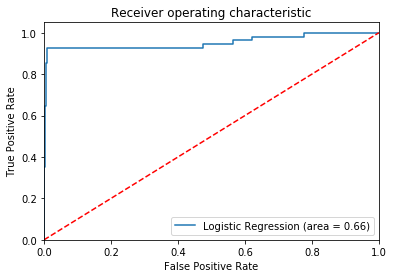

In [38]:
#Run the base model with all the variables.

# capture the target
base_y_train = base_X_train['Loan_Flag']
base_y_test = base_X_test['Loan_Flag']

base_X_train = base_X_train.drop(['Client_ID','Loan_Flag'], axis = 1)
base_X_test = base_X_test.drop(['Client_ID','Loan_Flag'], axis = 1)

trn_n_tst_model(base_X_train,base_X_test,base_y_train,base_y_test)

Accuracy of logistic regression classifier on test set: 0.98
 
 
Confusion Matrix:
[[2921    0]
 [  54    0]]
 
 
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2921
           1       0.00      0.00      0.00        54

   micro avg       0.98      0.98      0.98      2975
   macro avg       0.49      0.50      0.50      2975
weighted avg       0.96      0.98      0.97      2975

 
 


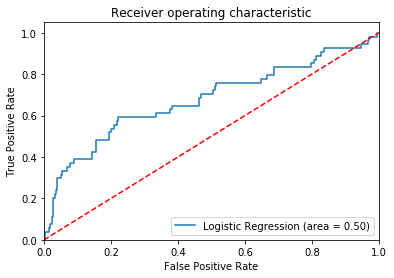

In [56]:
#Run the model with best selected variables
# capture the target

base_y_train = base_X_train['Loan_Flag']
base_y_test = base_X_test['Loan_Flag']

base_X_train = base_X_train[features]
base_X_test = base_X_test[features]

trn_n_tst_model(base_X_train,base_X_test,base_y_train,base_y_test)

Accuracy of logistic regression classifier on test set: 0.99
 
 
Confusion Matrix:
[[2921    0]
 [  36   18]]
 
 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2921
           1       1.00      0.33      0.50        54

   micro avg       0.99      0.99      0.99      2975
   macro avg       0.99      0.67      0.75      2975
weighted avg       0.99      0.99      0.98      2975

 
 


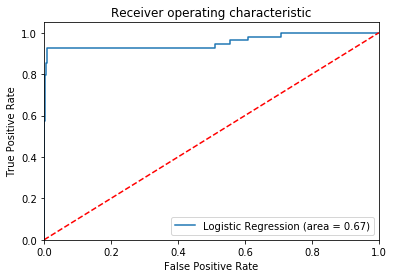

In [61]:
#Run the model with best top 5 best selected variables based on decreasing IV values

# capture the target
base_y_train = base_X_train['Loan_Flag']
base_y_test = base_X_test['Loan_Flag']

base_X_train = base_X_train[features+['Prv_Loan_Flag','Num_txns']]
base_X_test = base_X_test[features+['Prv_Loan_Flag','Num_txns']]

trn_n_tst_model(base_X_train,base_X_test,base_y_train,base_y_test)

Accuracy of logistic regression classifier on test set: 0.99
 
 
Confusion Matrix:
[[2920    1]
 [  37   17]]
 
 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2921
           1       0.94      0.31      0.47        54

   micro avg       0.99      0.99      0.99      2975
   macro avg       0.97      0.66      0.73      2975
weighted avg       0.99      0.99      0.98      2975

 
 


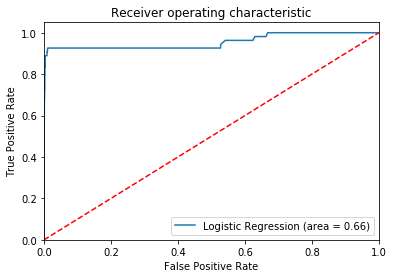

In [69]:
#Run the model with best top 3 best selected variables based on decreasing IV values

# capture the target
base_y_train = base_X_train['Loan_Flag']
base_y_test = base_X_test['Loan_Flag']

base_X_train = base_X_train[['Prv_Loan_Flag', 'Num_txns', 'Avg_CA_txn_amt_grp_lbl']]
base_X_test = base_X_test[['Prv_Loan_Flag', 'Num_txns', 'Avg_CA_txn_amt_grp_lbl']]

trn_n_tst_model(base_X_train,base_X_test,base_y_train,base_y_test)

In [105]:
# load dataset
# We  load the datasets with the engineered values: we built and saved this datasets in a previous sheet.

# Set Directory
os.chdir('C:/Users/aksha/Desktop/BOI_Challenge/')

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

(1711, 5)

In [86]:
# capture the target
y_train = X_train['Loan_Flag']

In [80]:
# load selected features

features = pd.read_csv('slctd_feat_IV_WOE.csv', header=None)
features = [x for x in features[0]] 

#Adding above two features based on test results
features = features + ['Prv_Loan_Flag','Num_txns']
features

['Avg_CA_txn_amt_grp_lbl',
 'Lst_txn_amt',
 'Prod_Held_Count',
 'Prv_Loan_Flag',
 'Num_txns']

In [83]:
# reduce the train and test set to the desired features

X_train = X_train[features]
X_test = X_test[features]


,Avg_CA_txn_amt_grp_lbl,Lst_txn_amt,Prod_Held_Count,Prv_Loan_Flag,Num_txns
0,1,0.008049,4,0,0.02
1,1,0.027513,4,0,0.00
2,1,1.115320,2,0,0.28
3,1,0.970251,2,0,0.31
4,1,1.030062,1,0,0.12


In [89]:
# Creating function to run and evaluate base model combination with model run by selecting
#best predictor variable

#Logistic Regression Model Fitting 
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
    
y_pred_mdl = logreg.predict(X_test)  

In [101]:
df_pred_Y = pd.DataFrame(data=y_pred_mdl,columns=['Loan_Flag'])

In [117]:
#Concatenating 'Predicted Y values to X_Test data_frame'

#Creating Index
df_pred_Y['index1'] = df_pred_Y.index
X_test['index1'] = X_test.index

#Concatenate Data_Frame
X_test_final = X_test.merge(df_pred_Y, how = 'inner', on = ['index1'])
X_test_final = X_test_final.drop(['index1'], axis = 1)


,Avg_CA_txn_amt_grp_lbl,Lst_txn_amt,Prod_Held_Count,Prv_Loan_Flag,Num_txns,Loan_Flag
0,1,0.008049,4,0,0.02,0
1,1,0.027513,4,0,0.00,0
2,1,1.115320,2,0,0.28,0
3,1,0.970251,2,0,0.31,0
4,1,1.030062,1,0,0.12,0


In [104]:
df_pred_Y.to_csv('y_predicted.csv', index=False)

**Create Buckets**
I am creating buckets of very high likelyhood to very low likelyhood based on the occurence percentage of target variable 'Loan_Flag' = 1'. The segments are created on variables selected by Information value.

In [121]:
X_train_count = pd.read_csv('xtrain.csv')
features_new = features+['Loan_Flag']
X_train_count_df = X_train_count[features_new]
X_train_count_df.head()

,Avg_CA_txn_amt_grp_lbl,Lst_txn_amt,Prod_Held_Count,Prv_Loan_Flag,Num_txns,Loan_Flag
0,1,0.498974,4,1,0.00,0
1,3,0.087504,4,0,0.17,0
2,1,0.582233,2,0,0.25,0
3,1,0.072993,2,1,0.13,0
4,1,0.283609,1,0,0.39,0


In [122]:
# Number of people who took loan
pd.crosstab(X_train_count_df['Loan_Flag'], columns = 'count', normalize = True)

col_0,count
Loan_Flag,
0,0.983559
1,0.016441


We have to take the values for which the loan was taken,ie, loan_flag = 1 to know the likelyhood column wise

In [132]:
# Num_txns is the best predictor variable based on information value
X_trn_Loan1 = X_train_count_df[X_train_count_df["Loan_Flag"] == 1]

#Creating category for number of transactions
X_trn_Loan1['Num_txns_Grp'] = pd.cut(x=X_trn_Loan1['Num_txns'], bins=[-0.10,0.25, 0.50, 0.75, 1.00], labels=['<25', '26-50', '51-75','76-100'])

#Calculating Proportion of each variable
pd.crosstab(X_trn_Loan1['Num_txns_Grp'], columns = 'count', normalize = True)

col_0,count
Num_txns_Grp,
<25,0.030675
26-50,0.128834
51-75,0.165644
76-100,0.674847


From the above cell, we can see that 'Num of Txns' of 76-100 contributed the most to loan likelyhood, i.e., around 67%. We will segment '76-100' Number of transactions 

In [136]:
# Previous_Loan_Flag is the next-best predictor variable based on information value
#Further segmentation based on Previous Loan Flag which was second best.
X_trn_Loan1_76_100 = X_trn_Loan1[X_trn_Loan1["Num_txns_Grp"] == '76-100']

#Calculating Proportion of each variable
pd.crosstab(X_trn_Loan1_76_100['Prv_Loan_Flag'], columns = 'count', normalize = True)

col_0,count
Prv_Loan_Flag,
0,0.172727
1,0.827273


From the above cell, we can see that people who did transactions between 76-100 and have taken previous loan are more likely to purchase loan. We will do futher segmentation on Ang CA txn amount.

In [139]:
# Avg_CA_txn_Amount_Label is the next-best predictor variable based on information value

#X_trn_Loan1_76_100_PrvLoan_Yes = X_trn_Loan1_76_100[X_trn_Loan1_76_100["Prv_Loan_Flag"] == 1]

#Calculating Proportion of each variable
pd.crosstab(X_trn_Loan1_76_100_PrvLoan_Yes['Avg_CA_txn_amt_grp_lbl'], columns = 'count', normalize = True)

col_0,count
Avg_CA_txn_amt_grp_lbl,
1,0.879121
2,0.065934
3,0.054945


From the above cell, we can see that people who did Avg CA txn amount between 1000-2000 and have taken previous loan with 76-100 transactions are more likely to purchase loan. We will do futher segmentation on last transaction amount.

In [161]:
# Lst_Txn_Amt is the next-best predictor variable based on information value

X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA = X_trn_Loan1_76_100_PrvLoan_Yes[X_trn_Loan1_76_100_PrvLoan_Yes['Avg_CA_txn_amt_grp_lbl'] == 1]


#Creating category for number of transactions
X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA['Lst_txn_amt_Catg'] = pd.cut(x=X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA['Lst_txn_amt'], bins=[-0.1000,0.2500, 0.5000, 0.7500, 1.0000], labels=['<0.2500', '0.2501-0.50000', '0.5001-0.7500','0.7501-1.0000'])


#Calculating Proportion of each variable
pd.crosstab(X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA['Lst_txn_amt_Catg'], columns = 'count', normalize = True)

[0.7501-1.0000, 0.5001-0.7500, <0.2500, 0.2501-0.50000]
Categories (4, object): [<0.2500 < 0.2501-0.50000 < 0.5001-0.7500 < 0.7501-1.0000]

From the above cell, we can see that people whose Last_amt_txn category is between 0.50001-0.7500 and 0.7501-1.0000 and have taken previous loan with 76-100 transactions are more likely to purchase loan. We will do futher segmentation on bot Lst_txn_amount_categories.

In [154]:
# Prod_Held_Count is the next-best predictor variable based on information value

X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA_Lsttxn_50btw75 = X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA[X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA['Lst_txn_amt_Catg'] == '0.5001-0.7500']

X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA_Lsttxn_75btw100 = X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA[X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA['Lst_txn_amt_Catg'] == '0.7501-1.0000']

#Calculating Proportion of each variable

pd.crosstab(X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA_Lsttxn_50btw75['Prod_Held_Count'], columns = 'count', normalize = True)

pd.crosstab(X_trn_Loan1_76_100_PrvLoan_Yes_Avg_CA_Lsttxn_75btw100['Prod_Held_Count'], columns = 'count', normalize = True)

col_0,count
Prod_Held_Count,
1,0.363636
2,0.090909
3,0.181818
4,0.227273
5,0.136364


From the above cell, we can see that people who have 1 product and lies in last txn category of 0.7501-1.000 with an Avg CA txn amount between 1000-2000 having previous Loan with the number of txns between 76-100 is more likely to purchase loan than the person who has 2 products and lies in last txn category of 0.5001-0.7500 with an Avg CA txn amount between 1000-2000 having previous Loan with the number of txns between 76-100.

#Create categories
As we now have different combination of variables and their likelyhood of buying loan. We will divide them into 5 categories based on likelyhood of buying loan, and then apply those categories to test data to create different groups of 2000 individuals

The categories are as follows:
1. Very High Likelihood
2. High Likelihood
3. Medium Likelihood
4. Low Likelihood
5. Very Low Likelihood

The division of groups is based on following criteria:
1. 

In [166]:
#Creating Categories for Num of Txns and Last Txn Amount

#Creating category for number of transactions
#X_test_final['Num_txns_Grp'] = pd.cut(x=X_test_final['Num_txns'], bins=[-0.10,0.25, 0.50, 0.75, 1.00], labels=['<25', '26-50', '51-75','76-100'])

#Creating category for number of transactions
X_test_final['Lst_txn_amt_Catg'] = pd.cut(x=X_test_final['Lst_txn_amt'], bins=[-0.1000,0.2500, 0.5000, 0.7500, 1.5000], labels=['<0.2500', '0.2501-0.50000', '0.5001-0.7500','0.7501-1.0000'])
X_test_final = X_test_final[X_test_final['Lst_txn_amt_Catg'] != '']
X_test_final['Lst_txn_amt_Catg'].unique()

[<0.2500, 0.7501-1.0000, 0.5001-0.7500, 0.2501-0.50000, NaN]
Categories (4, object): [<0.2500 < 0.2501-0.50000 < 0.5001-0.7500 < 0.7501-1.0000]